In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols

# Developing and Assessing the Model

This notebook introduces the idea of a line of best fit using conventional Least Squares routines.

In [2]:
ads = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [3]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


### Relationships Between Variables

Because we are examining linear relationships, it's important to remember we are looking to develop a model to predict with.  We will find the vocabulary of **response** (y axis) variable used here, and with a simple linear model we are looking at something like:

$$\text{response} = \text{predictor}\times \text{slope} + \text{intercept}$$

In the example of the advertising data, we are interested in how the **predictors** (x axis) of TV, radio, and newspaper are related to sales. To start, let's look at a basic plot of the data. 

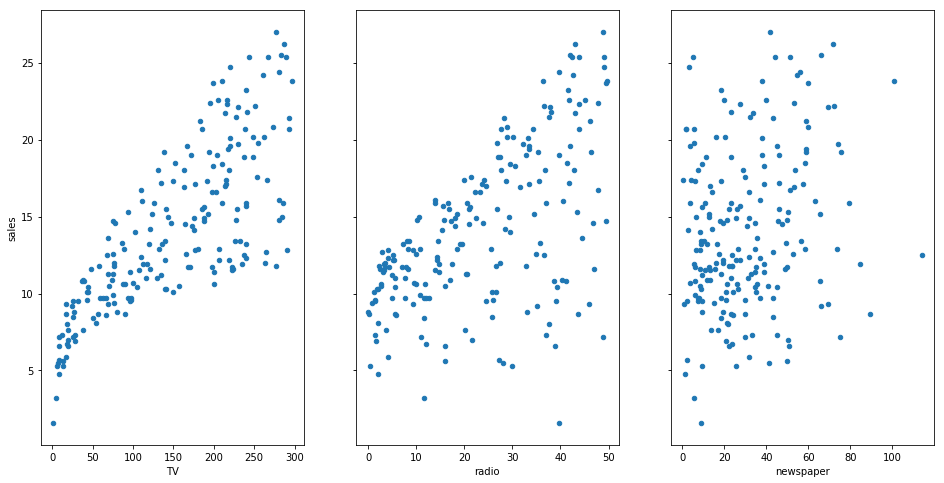

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
ads.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
ads.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
ads.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

There are a number of libraries with linear model capabilities.  We will start by looking at the the `.polyfit` and `.polyval` methods in NumPy.  As a first example, let's see how `TV` and `sales` are related.

In [6]:
lm = np.polyfit(ads['newspaper'], ads['sales'], 1)

In [7]:
lm

array([ 0.0546931 , 12.35140707])

array (slope, intercept) 

Thus, the equation (with some rounding) is

$$ y = 0.05 + 7.04x$$

With `.polyval()` we can evaluate our model at the values for television and plot a predicted line.

In [9]:
predictions = np.polyval(lm, ads['newspaper'])

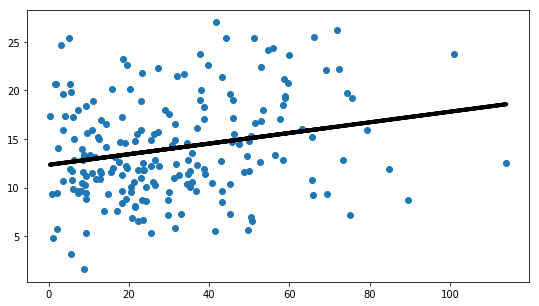

In [10]:
plt.figure(figsize = (9, 5))
plt.scatter(ads['newspaper'], ads['sales'])
plt.plot(ads['newspaper'], predictions, color = 'black', linewidth = 4)

Remember that the idea here is to use this to make a prediction about money spent in Television advertising and its effect on sales.  If we evaluate the model at 50,000 we find a prediction of 2383 or so sales in that given market.

In [11]:
np.polyval(lm, 50000)

2747.0063306829443

### StatsModels

Now, we investigate the `statsmodels` version of linear regression.  Here, he summary information is a little more deliberate than the NumPy version.

In [12]:
import statsmodels.formula.api as smf

In [13]:
lm = smf.ols(formula = 'sales ~ newspaper', data = ads).fit()

OLS = Ordinary Least Squares  
   formula = ' Y axis ~ X Axis', data = ads

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 29 Mar 2018   Prob (F-statistic):            0.00115
Time:                        19:32:13   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#investigate residuals == tells you how far from the benchmark you are for each point 
lm.resid[:5]

1    5.963831
2   -4.418066
3   -6.841639
4    2.949047
5   -2.645484
dtype: float64

In [16]:
#examine parameters
lm.params

Intercept    12.351407
newspaper     0.054693
dtype: float64

In [17]:
#r2 value == you want this number to be closer to 1, because it means that you are closer to the benchmark 
lm.rsquared

0.05212044544430516

The $r^2$ value tells us the proportion of variance explained.  It comes from the formula:

$$r^2 = \frac{TSS (total sum of squares) - RSS(residual sum of squares) }{TSS}$$

This is a way for us to understand the predictive capability of our model in terms of the variance.  We would say in this example, that our model describes roughly 62% of the data.

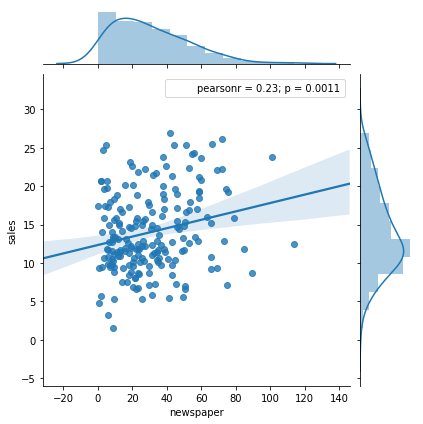

In [18]:
sns.jointplot('newspaper', 'sales', data = ads, kind = 'reg')

### Residuals

We can examine the residuals of the model to understand more about the quality of fit and whether we are using an appropriate model.  The following assumptions are made about residuals in the OLS method.

<div class="alert alert-danger" role="alert">
<ul>
<li> Should be balanced and symmetric about 0</li>
    <li> Should be free of trends </li>
<li> Absolute value or overall magnitude of residuals should be roughly the same for entire dataset.  The assumption that magnitude of variance is constant is "homoscedasticity".</li>
    <li> Residuals distributed according to a Gaussian/aka normal distribution </li>
    </ul>
</div>

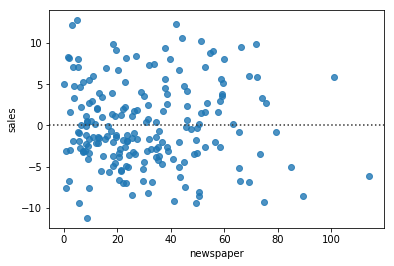

In [19]:
sns.residplot('newspaper', 'sales', data = ads)

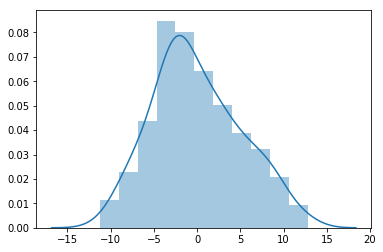

In [20]:
sns.distplot(lm.resid)

In [21]:
resids = pd.DataFrame({'residuals': lm.resid})

In [22]:
resids.skew()

residuals    0.33205
dtype: float64

In [23]:
resids.kurt()

residuals   -0.454221
dtype: float64

**Further Assessments**

There are many other ways to complexify your understanding of regression models.  The statsmodels library has many additional capabilities including some nice plots of summary fit information.

http://www.statsmodels.org/dev/graphics.html#regression-plots

C:\Users\ginak\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


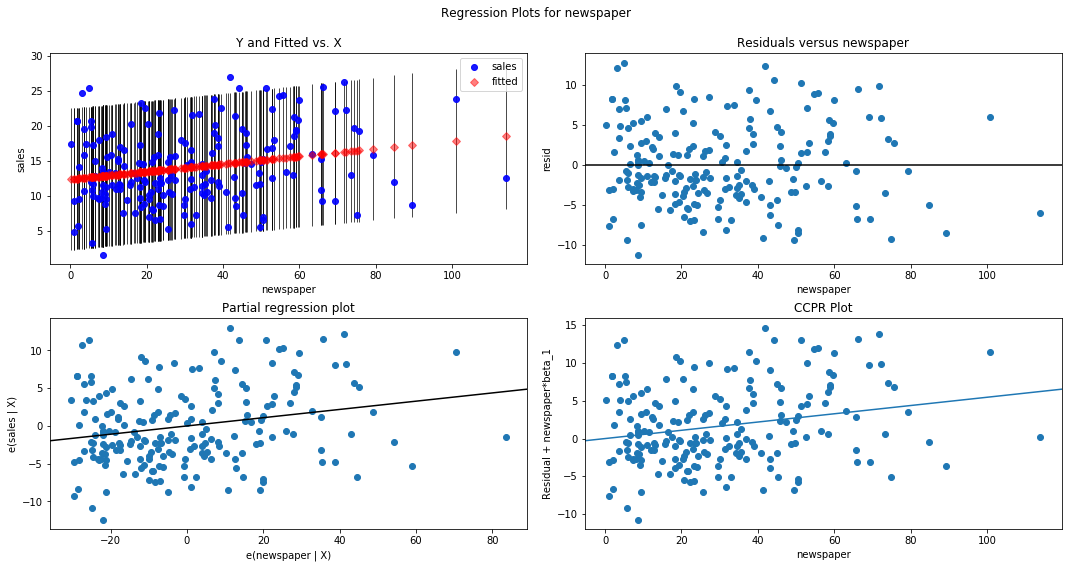

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(lm, "newspaper", fig=fig)

**PROBLEM**

How do the other features fair as single predictors?  

1. Determine a line of best fit for the other variables against sales.

2. Decide which of the linear models is the best predictor and why.